In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [184]:
data = pd.read_csv('preproccessed_data2.csv')

In [185]:
list = ['dt_unspec','dt_smartphone','dt_featurephone','os_proprietory','os_unspec',
        'gender_unspec','dm_apple','lr_nw','kano','unspec_state','fct','rivers','lr_unspec','dm_others','os_android','lr_sw']
X = data.drop(list,axis = 1 )
y = data.loc[:,'event_type']

In [186]:
X.columns

Index(['spend_total', 'spend_vas', 'spend_voice', 'spend_data', 'sms_cost',
       'xtra_data_talk_rev', 'customer_class', 'customer_value', 'age',
       'lr_nc', 'lr_ne', 'lr_se', 'lr_ss', 'lagos', 'ogun', 'other_states',
       'dm_infinix', 'dm_itel', 'dm_nokia', 'dm_samsung', 'dm_techno',
       'gender_f', 'gender_m', 'event_type'],
      dtype='object')

In [180]:
# import module
from sklearn.model_selection import train_test_split
# split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [181]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(46717, 23) (20022, 23) (46717,) (20022,)


#### Random Forest

Accuracy is:  0.9742782938767356
Precision: 0.730
Recall: 0.173


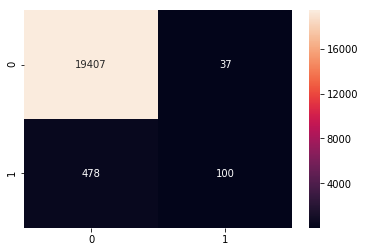

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print("Precision: %.3f" % precision_score(y_test,clf_rf.predict(X_test)))
print("Recall: %.3f" % recall_score(y_test,clf_rf.predict(X_test)))

Feature ranking:
1. feature 0 (0.258507)
2. feature 2 (0.142365)
3. feature 8 (0.127301)
4. feature 4 (0.076926)
5. feature 1 (0.073166)
6. feature 6 (0.068791)
7. feature 3 (0.061556)
8. feature 7 (0.031087)
9. feature 15 (0.019213)
10. feature 20 (0.014718)
11. feature 9 (0.013868)
12. feature 12 (0.012238)
13. feature 22 (0.011875)
14. feature 13 (0.011441)
15. feature 21 (0.010825)
16. feature 17 (0.010444)
17. feature 11 (0.010355)
18. feature 19 (0.008929)
19. feature 16 (0.008867)
20. feature 14 (0.007373)
21. feature 5 (0.007337)
22. feature 10 (0.006893)
23. feature 18 (0.005924)


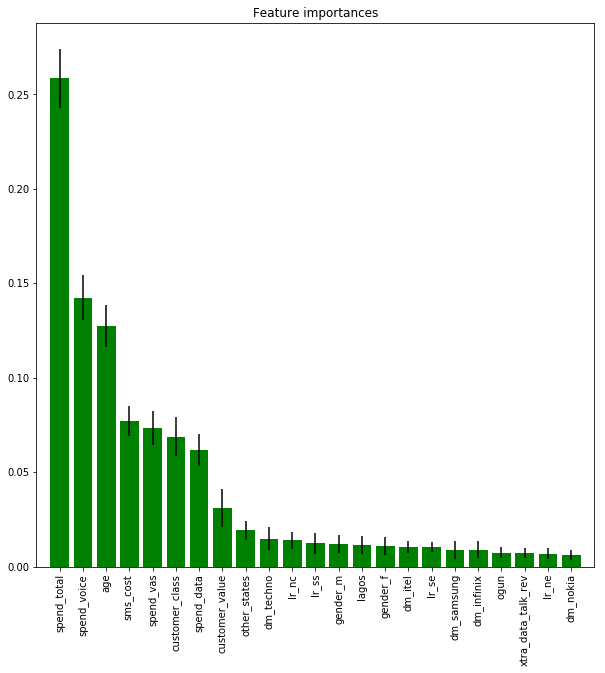

In [183]:
rf_5 = RandomForestClassifier()      
rf_5 = rf_5.fit(X_train,y_train)
importances = rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Accuracy is:  0.9745879532514234
Precision: 0.694
Recall: 0.165


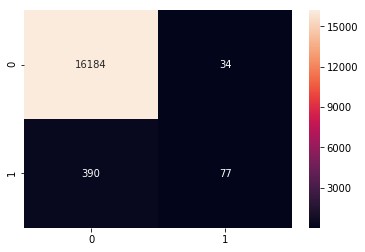

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print("Precision: %.3f" % precision_score(y_test,clf_rf.predict(X_test)))
print("Recall: %.3f" % recall_score(y_test,clf_rf.predict(X_test)))

In [ ]:
list = ['event_type','dt_unspec','dt_smartphone','dt_featurephone','os_proprietory','os_unspec',
        'gender_unspec','dm_apple','lr_nw','kano','unspec_state','fct','rivers']
X = data.drop(list,axis = 1 )
y = data.loc[:,'event_type']

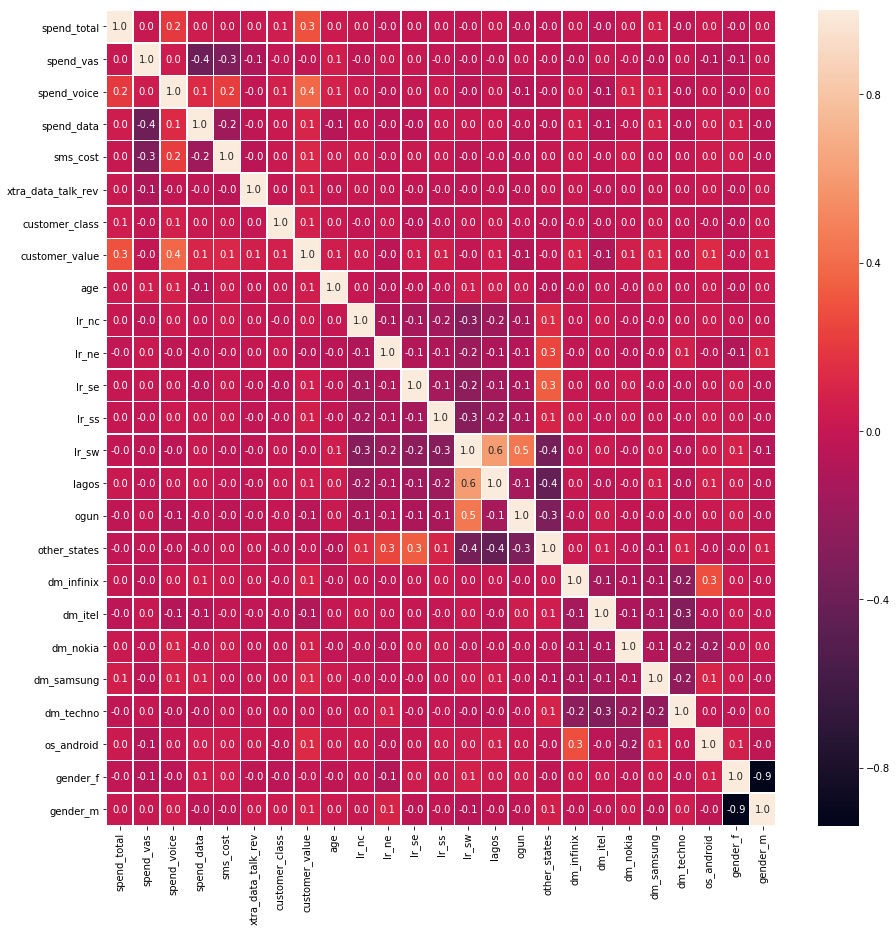

In [158]:
X = X
#correlation map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### Logistic Regression

C:\Users\AKIN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.972
Precision: 0.000
Recall: 0.000


C:\Users\AKIN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


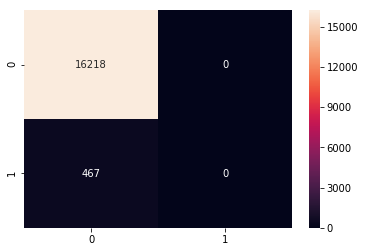

In [9]:
# import packages
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# create the model
logistic_reg = LogisticRegression()

# fit the model on the training set
logistic_reg.fit(X_train, y_train)

predictions = logistic_reg.predict(X_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,fmt="d")
# evaluate the model performance using accuracy metric
print("Accuracy: %.3f" % accuracy_score(y_test, predictions))
print("Precision: %.3f" % precision_score(y_test,predictions))
print("Recall: %.3f" % recall_score(y_test,predictions))

#### Support vector machine

Accuracy: 0.972
Precision: 0.000
Recall: 0.000


C:\Users\AKIN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


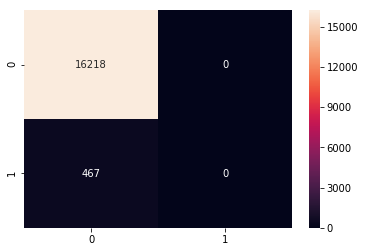

In [10]:
# import packages
from sklearn.svm import SVC

# create the model
svc_model = SVC()

# fit the model on the training set
svc_model.fit(X_train, y_train)

# make predictions on the test set
predictions = svc_model.predict(X_test)
cmsv = confusion_matrix(y_test, predictions)
sns.heatmap(cmsv,annot=True,fmt="d")
# evaluate the model performance using accuracy metric
print("Accuracy: %.3f" % accuracy_score(y_test, predictions))
print("Precision: %.3f" % precision_score(y_test,predictions))
print("Recall: %.3f" % recall_score(y_test,predictions))

#### Decision Tree

Accuracy: 0.95
Precision: 0.168
Recall: 0.201


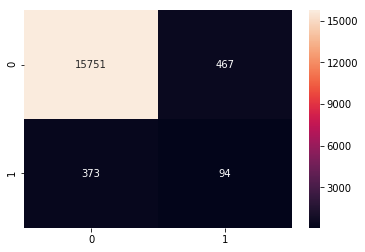

In [10]:
#Fitting Decision tree to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy',random_state=0)
classifier.fit(X_train, y_train)

#Predicting the test result
prediction = classifier.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cms = confusion_matrix(y_test, prediction)
sns.heatmap(cms,annot=True,fmt="d")
print("Accuracy: %.2f" % accuracy_score(y_test, prediction))
print("Precision: %.3f" % precision_score(y_test, prediction))
print("Recall: %.3f" % recall_score(y_test, prediction))


#### Catboost

In [11]:
import sklearn.metrics as sklm
from catboost import Pool, CatBoostClassifier, cv

In [12]:
model = CatBoostClassifier(iterations=1500, depth=8, learning_rate=0.01,eval_metric='Precision',use_best_model=True, random_seed=42)
model.fit(X_train,y_train,eval_set=(X_test,y_test))


0:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 389ms	remaining: 9m 42s
1:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 480ms	remaining: 5m 59s
2:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 570ms	remaining: 4m 44s
3:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 677ms	remaining: 4m 13s
4:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 757ms	remaining: 3m 46s
5:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 847ms	remaining: 3m 30s
6:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 959ms	remaining: 3m 24s
7:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1.05s	remaining: 3m 15s
8:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1.13s	remaining: 3m 7s
9:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1.24s	remaining: 3m 4s
10:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1.32s	remaining: 2m 58s
11:	learn: 1.0000000	test: 1.0000000	best: 1

95:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.71s	remaining: 2m 7s
96:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.79s	remaining: 2m 7s
97:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.88s	remaining: 2m 7s
98:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 8.98s	remaining: 2m 7s
99:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 9.07s	remaining: 2m 7s
100:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 9.16s	remaining: 2m 6s
101:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 9.26s	remaining: 2m 6s
102:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 9.34s	remaining: 2m 6s
103:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 9.43s	remaining: 2m 6s
104:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 9.53s	remaining: 2m 6s
105:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 9.62s	remaining: 2m 6s
106:	learn: 1.0000000	test: 1.0000000

190:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.6s	remaining: 2m
191:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.7s	remaining: 2m
192:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.8s	remaining: 2m
193:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.8s	remaining: 2m
194:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 17.9s	remaining: 2m
195:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18s	remaining: 1m 59s
196:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.1s	remaining: 1m 59s
197:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.2s	remaining: 1m 59s
198:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.3s	remaining: 1m 59s
199:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.4s	remaining: 1m 59s
200:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.5s	remaining: 1m 59s
201:	learn: 1.0000000	test: 1.0000000	best:

285:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.6s	remaining: 1m 52s
286:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.7s	remaining: 1m 52s
287:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.8s	remaining: 1m 52s
288:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.9s	remaining: 1m 52s
289:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.9s	remaining: 1m 52s
290:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 27s	remaining: 1m 52s
291:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 27.1s	remaining: 1m 52s
292:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 27.2s	remaining: 1m 52s
293:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 27.3s	remaining: 1m 52s
294:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 27.4s	remaining: 1m 51s
295:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 27.5s	remaining: 1m 51s
296:	learn: 1.0000000	t

378:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.3s	remaining: 1m 44s
379:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.4s	remaining: 1m 44s
380:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.5s	remaining: 1m 44s
381:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.6s	remaining: 1m 44s
382:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.7s	remaining: 1m 44s
383:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.7s	remaining: 1m 43s
384:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.8s	remaining: 1m 43s
385:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 35.9s	remaining: 1m 43s
386:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 36s	remaining: 1m 43s
387:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 36.1s	remaining: 1m 43s
388:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 36.2s	remaining: 1m 43s
389:	learn: 1.0000000	t

471:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 44.2s	remaining: 1m 36s
472:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 44.2s	remaining: 1m 36s
473:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 44.3s	remaining: 1m 35s
474:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 44.4s	remaining: 1m 35s
475:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 44.5s	remaining: 1m 35s
476:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 44.6s	remaining: 1m 35s
477:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 44.7s	remaining: 1m 35s
478:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 44.8s	remaining: 1m 35s
479:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 44.9s	remaining: 1m 35s
480:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 45s	remaining: 1m 35s
481:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 45.1s	remaining: 1m 35s
482:	learn: 1.0000000	t

565:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 52.9s	remaining: 1m 27s
566:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53s	remaining: 1m 27s
567:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.1s	remaining: 1m 27s
568:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.2s	remaining: 1m 27s
569:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.3s	remaining: 1m 26s
570:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.4s	remaining: 1m 26s
571:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.5s	remaining: 1m 26s
572:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.5s	remaining: 1m 26s
573:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.6s	remaining: 1m 26s
574:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.7s	remaining: 1m 26s
575:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 53.8s	remaining: 1m 26s
576:	learn: 1.0000000	t

658:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 1m 19s
659:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 1m 19s
660:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 1m 19s
661:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 1m 19s
662:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 1m 19s
663:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 1m 19s
664:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 1m 18s
665:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 2s	remaining: 1m 18s
666:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 3s	remaining: 1m 18s
667:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 3s	remaining: 1m 18s
668:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 3s	remaining: 1m 18s
669:	learn: 1.0000000

752:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 11s	remaining: 1m 10s
753:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 11s	remaining: 1m 10s
754:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 11s	remaining: 1m 10s
755:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 11s	remaining: 1m 10s
756:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 11s	remaining: 1m 10s
757:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 11s	remaining: 1m 10s
758:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 11s	remaining: 1m 10s
759:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 11s	remaining: 1m 10s
760:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 11s	remaining: 1m 9s
761:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 12s	remaining: 1m 9s
762:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 12s	remaining: 1m 9s
763:	learn: 1

844:	learn: 0.9473684	test: 1.0000000	best: 1.0000000 (0)	total: 1m 19s	remaining: 1m 1s
845:	learn: 0.9473684	test: 1.0000000	best: 1.0000000 (0)	total: 1m 20s	remaining: 1m 1s
846:	learn: 0.9473684	test: 1.0000000	best: 1.0000000 (0)	total: 1m 20s	remaining: 1m 1s
847:	learn: 0.9473684	test: 1.0000000	best: 1.0000000 (0)	total: 1m 20s	remaining: 1m 1s
848:	learn: 0.9473684	test: 1.0000000	best: 1.0000000 (0)	total: 1m 20s	remaining: 1m 1s
849:	learn: 0.9500000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 20s	remaining: 1m 1s
850:	learn: 0.9500000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 20s	remaining: 1m 1s
851:	learn: 0.9500000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 20s	remaining: 1m 1s
852:	learn: 0.9500000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 20s	remaining: 1m 1s
853:	learn: 0.9500000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 20s	remaining: 1m 1s
854:	learn: 0.9500000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 20s	remaining: 1m 1s
855:	learn: 0.9500000

938:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 28s	remaining: 53.1s
939:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 28s	remaining: 53s
940:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 28s	remaining: 52.9s
941:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 29s	remaining: 52.8s
942:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 29s	remaining: 52.7s
943:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 29s	remaining: 52.6s
944:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 29s	remaining: 52.5s
945:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 29s	remaining: 52.4s
946:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 29s	remaining: 52.3s
947:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 29s	remaining: 52.2s
948:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 29s	remaining: 52.1s
949:	learn: 0.9600000	t

1032:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 44.4s
1033:	learn: 0.9600000	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 44.3s
1034:	learn: 0.9615385	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 44.2s
1035:	learn: 0.9615385	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 44.1s
1036:	learn: 0.9615385	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 44s
1037:	learn: 0.9615385	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 43.9s
1038:	learn: 0.9615385	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 43.8s
1039:	learn: 0.9615385	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 43.7s
1040:	learn: 0.9615385	test: 1.0000000	best: 1.0000000 (0)	total: 1m 38s	remaining: 43.6s
1041:	learn: 0.9615385	test: 1.0000000	best: 1.0000000 (0)	total: 1m 39s	remaining: 43.5s
1042:	learn: 0.9615385	test: 1.0000000	best: 1.0000000 (0)	total: 1m 39s	remaining: 43.4s
1043:	learn:

1125:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 47s	remaining: 35.6s
1126:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 47s	remaining: 35.5s
1127:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 47s	remaining: 35.4s
1128:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 47s	remaining: 35.3s
1129:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 47s	remaining: 35.2s
1130:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 47s	remaining: 35.1s
1131:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 47s	remaining: 35s
1132:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 47s	remaining: 34.9s
1133:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 47s	remaining: 34.8s
1134:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 48s	remaining: 34.7s
1135:	learn: 0.9629630	test: 1.0000000	best: 1.0000000 (0)	total: 1m 48s	remaining: 34.6s
1136:	learn:

1218:	learn: 0.9705882	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 26.8s
1219:	learn: 0.9705882	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 26.7s
1220:	learn: 0.9705882	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 26.6s
1221:	learn: 0.9687500	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 26.5s
1222:	learn: 0.9705882	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 26.4s
1223:	learn: 0.9705882	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 26.3s
1224:	learn: 0.9705882	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 26.2s
1225:	learn: 0.9687500	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 26.1s
1226:	learn: 0.9705882	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 26s
1227:	learn: 0.9705882	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 25.9s
1228:	learn: 0.9705882	test: 1.0000000	best: 1.0000000 (0)	total: 1m 56s	remaining: 25.8s
1229:	learn:

1311:	learn: 0.9743590	test: 1.0000000	best: 1.0000000 (0)	total: 2m 4s	remaining: 17.9s
1312:	learn: 0.9750000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 4s	remaining: 17.8s
1313:	learn: 0.9750000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 4s	remaining: 17.7s
1314:	learn: 0.9750000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 5s	remaining: 17.6s
1315:	learn: 0.9750000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 5s	remaining: 17.5s
1316:	learn: 0.9750000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 5s	remaining: 17.4s
1317:	learn: 0.9750000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 5s	remaining: 17.3s
1318:	learn: 0.9750000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 5s	remaining: 17.2s
1319:	learn: 0.9750000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 5s	remaining: 17.1s
1320:	learn: 0.9750000	test: 1.0000000	best: 1.0000000 (0)	total: 2m 5s	remaining: 17s
1321:	learn: 0.9761905	test: 1.0000000	best: 1.0000000 (0)	total: 2m 5s	remaining: 16.9s
1322:	learn: 0.9750000	

1403:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 13s	remaining: 9.13s
1404:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 13s	remaining: 9.04s
1405:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 13s	remaining: 8.94s
1406:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 13s	remaining: 8.85s
1407:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 13s	remaining: 8.75s
1408:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 14s	remaining: 8.65s
1409:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 14s	remaining: 8.56s
1410:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 14s	remaining: 8.46s
1411:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 14s	remaining: 8.37s
1412:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 14s	remaining: 8.27s
1413:	learn: 0.9772727	test: 1.0000000	best: 1.0000000 (0)	total: 2m 14s	remaining: 8.18s
1414:	lear

1497:	learn: 0.9782609	test: 1.0000000	best: 1.0000000 (0)	total: 2m 22s	remaining: 190ms
1498:	learn: 0.9782609	test: 1.0000000	best: 1.0000000 (0)	total: 2m 22s	remaining: 95.1ms
1499:	learn: 0.9782609	test: 1.0000000	best: 1.0000000 (0)	total: 2m 22s	remaining: 0us

bestTest = 1
bestIteration = 0

Shrink model to first 1 iterations.


In [13]:
def score_model(probs, threshold):
    return np.array([1 if X > threshold else 0 for X in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Predicted negative    Predicted positive')
    print('Actual negative    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual positive    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Negative      Positive')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = model.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)   

                 Confusion matrix
                 Predicted negative    Predicted positive
Actual negative     16218                 0
Actual positive       467                 0

Accuracy        0.97
AUC             0.54
Macro precision 0.49
Macro recall    0.50
 
           Negative      Positive
Num case    16218           467
Precision    0.97          0.00
Recall       1.00          0.00
F1           0.99          0.00


C:\Users\AKIN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dimensionality Reduction - Univariate feature selection and random forest classification

#### Dimentionality Reduction Using PCA
is trying to find a lower dimensional surface unto which to project the data so as to minimize the square projection error to minimize the location distance btw eacg points and the location its projected

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 15 features
select_feature = SelectKBest(chi2, k=23).fit(X_train, y_train)

Accuracy: 0.97
Precision: 0.655
Recall: 0.163


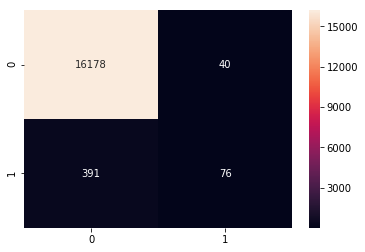

In [77]:
X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
rf_2 = RandomForestClassifier()      
rf_2 = rf_2.fit(X_train_2,y_train)

cm_2 = confusion_matrix(y_test,rf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")
# evaluate the model performance using accuracy metric
print("Accuracy: %.2f" % accuracy_score(y_test, rf_2.predict(X_test_2)))
print("Precision: %.3f" % precision_score(y_test,rf_2.predict(X_test_2)))
print("Recall: %.3f" % recall_score(y_test,rf_2.predict(X_test_2)))


In [18]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [14]:
C = X

In [15]:
# import module
from sklearn.model_selection import train_test_split
# split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.25, random_state=42)

In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [17]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [18]:
explained_variance

array([7.61956744e-02, 7.20415012e-02, 6.26082238e-02, 5.64473496e-02,
       5.23162909e-02, 4.96672171e-02, 4.71281156e-02, 4.27843466e-02,
       3.86010220e-02, 3.70799976e-02, 3.43175975e-02, 3.33657431e-02,
       3.21846037e-02, 3.16945851e-02, 3.12118144e-02, 2.98759425e-02,
       2.89973025e-02, 2.80943402e-02, 2.70078912e-02, 2.68764027e-02,
       2.58676880e-02, 2.31707561e-02, 2.26055055e-02, 2.11651399e-02,
       1.53780229e-02, 1.35331163e-02, 1.25646240e-02, 1.14186463e-02,
       9.13681059e-03, 6.66372886e-03, 4.79929033e-31, 3.34616218e-31,
       1.45585125e-31, 1.08225435e-31, 8.59189143e-32])

Text(0,0.5,'explained_variance_ratio_')

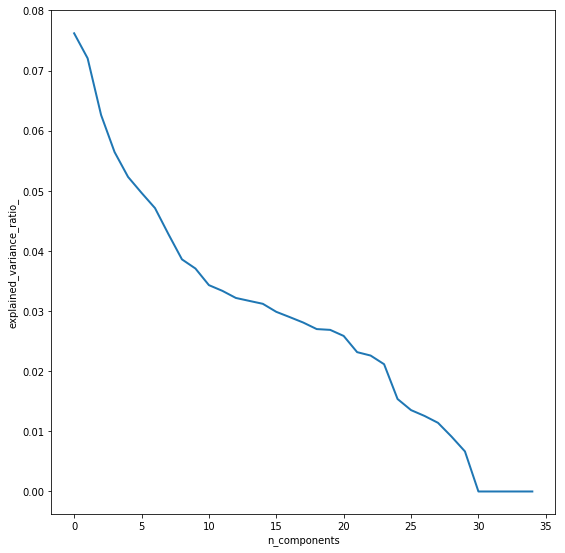

In [19]:
plt.figure(1, figsize=(10, 10))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Accuracy is:  0.9730896014384177
Precision: 0.564
Recall: 0.169


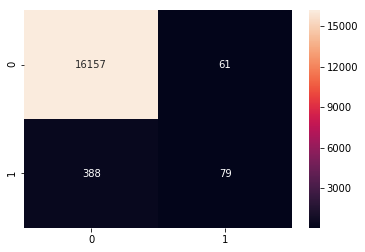

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print("Precision: %.3f" % precision_score(y_test,clf_rf.predict(X_test)))
print("Recall: %.3f" % recall_score(y_test,clf_rf.predict(X_test)))

In [187]:
X.to_csv (r'preproccessed_data3.csv', index = False, header=True)